
Continue working in your hypothesis_testing notebook.



## Q1) Answer with the type of test you would use (assume normal distribution):

### Is there a difference in grades of students on the second floor compared to grades of all students?

A: one sample ( 2 tailed )



#### Are adults who drink milk taller than adults who don't drink milk?

A: two sample  (one tailed testing)



### Is the price of gas higher in Texas or in New Mexico?

A: two sample  (one tailed testing)



### Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

A: Anova testing



In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

## Q2) Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

### A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.

### A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
# 2-sample, 2-tail 
# option 1: use the simulations 
# option 2: use ttest_ind_from_stats()

In [3]:
# using 2nd option 

$H_o$:There is no difference for its two offices.

$H_a$:There is difference for its two offices.

$a$=0.05

In [4]:
# Given data for office #1
n1 = 40  
mean1 = 90  
std_dev1 = 15  
# Given data for office #2
n2 = 50
mean2 = 100
std_dev2 = 20

In [5]:
# Calculate the t-score and p-value using scipy.stats.ttest_ind
t_stat, p_value = stats.ttest_ind_from_stats(mean1, std_dev1, n1, mean2, std_dev2, n2,equal_var=True,alternative='two-sided')


In [7]:
t_stat


-2.6252287036468456

In [8]:
p_value

0.01020985244923939

since p_value< 0.05 , so we reject Ho. 
this conclude that there is different in average time to sell homes for its two offices.

In [9]:
## using option 1:( using the simulations )
# We know they are normal specifically because we defined them as so
# Do we know that they have equal variance?
# Well we know the stds are different,
# but lets see what a levene test says

In [10]:
# simulations of the offices in two different ways:
# way 1: use numpy's normal random sample
office_1 = np.random.normal(90, 15, size=(40,))
office_2 = np.random.normal(100, 20, size=(50,))
########
# alternatively, another simulation method:
# using stats to simulate a normal dist and then take Random ValueS
office_1 = stats.norm(90,15)
office_2 = stats.norm(100,20)

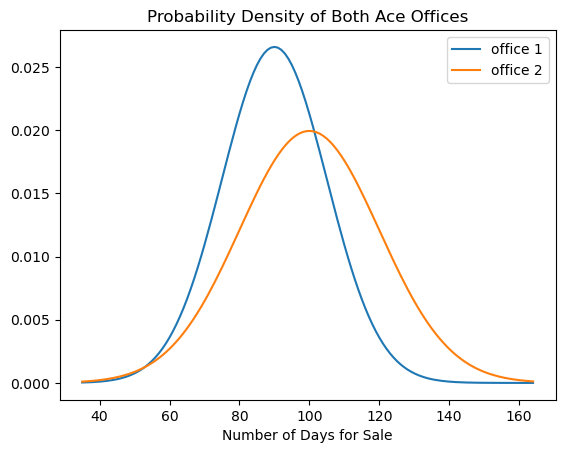

In [12]:
# a little bit of extra exploration:
x = np.arange(35, 165)
y1 = [office_1.pdf(n) for n in x]
y2 = [office_2.pdf(n) for n in x]
plt.plot(x, y1, label='office 1')
plt.plot(x, y2, label='office 2')
plt.legend()
plt.title('Probability Density of Both Ace Offices')
plt.xlabel('Number of Days for Sale')
plt.show()

In [13]:
# Testing 3 Parameters:
# 1.Normality:- We know they are normal specifically because we defined them as so
# 2.Independence: (assume theye are independent)
# 3. Equal variances: Do we know that they have equal variance?
# Well we know the stds are different,
# but lets see what a levene test says

In [14]:
# To check Equal variances ( using by "Levene test" ) 
# H0: The variance in office 1 sales is equivalent to office 2 sales
# H1: the variance in office 1 sales is different from office 2
# confidence level: standard, 95%(0.95)
# level of significance (alpha) : 0.05

lv_stat, p = stats.levene(office_1.rvs(40), office_2.rvs(50))
if p < 0.05:
    print('I can reject H0')
else:
    print('We fail to reject h0')

I can reject H0


In [15]:
# we fail to reject the null hypothesis, which means that
# we cannot assert(belief confidently) that these have different variances
# which means that students ttest will do.

In [17]:
#Ho:There is no difference in the average sale time between office 1 and office 2
#Ha:There is a difference in the average sale time for office 1 to office 2

In [18]:
def test_hypothesis(p, 
                    stat, 
                    tails='two', 
                    direction='greater',
                    α=0.05):
    '''
    test_hypothesis will take in a p value and a test statistic
    if p is less than a presumed alpha, then we  will reject
    our null hypothesis
    
    this takes in two positional arguments,
    p stat, a float value representing the probability of serendipity
    stat, a float value representing the test statistic
    
    with the keyword arguments f tails, direction, and alpha,
    the operator is able to change the control structrure in order
    to perform a one-tailed ttest if so desired
    '''
    if tails == 'two':
        if p < α:
            print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
        else:
            print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')
    else:
        if direction == 'greater':
            if ((p/2) < α) and (stat > 0):
                print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')
        else:
            if ((p/2) < α) and (stat < 0):
                print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')

## Q3) Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Are compact cars more fuel-efficient than the average car?

Do manual cars get better gas mileage than automatic cars?

In [19]:
from pydataset import data

In [20]:
df=data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [22]:
# 2-sample , 2-tail

In [23]:
# lets create a new column for fuel efficiency based on
# the average between city and highway mileage

In [24]:
# reassign mpg into a version of itself
# but this time with a new column called fuel_e
# that holds the harmonic mean between city and highway mileage

df = df.assign(fuel_e = stats.hmean((df.cty, df.hwy)))
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_e
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  fuel_e        234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [26]:
df.year.unique()

array([1999, 2008])

In [27]:
fuel_2008 = df[df.year == 2008].fuel_e
fuel_1999 = df[df.year == 1999].fuel_e

In [28]:
# means testing:
# 1.normality
# 2.variance
# 3.independence

In [29]:
fuel_2008.shape

(117,)

In [31]:
fuel_1999.shape

(117,)

In [ ]:
# so we have 117 samples for each, 
# I'll toss that in with CLT assumtions

In [32]:
# 2. variance:
# lets run a levene test:
# H0: the variance is equivalent for 99 vehicles compared to 2008 vehicles
# Ha: the variance is different for 99 vehicles compared to 08 vehicles
lev_stat, p = stats.levene(fuel_1999, fuel_2008)
test_hypothesis(p, lev_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.8602339200830025.
 Our statistic is 0.031071867429515194


In [33]:
# 3. independence? 
# We know that there are no samples in this dataframe
# that are 2008 and 1999.  These are exclusive.
# 
# two tailed ==> we want to know if there is a difference in general
# two sampled ==> 1999 vs 2008, not one of those against all cars
# proceeding forward with our means test:
t_stat, p = stats.ttest_ind(fuel_1999,
                            fuel_2008,
                            equal_var=True)
test_hypothesis(p, t_stat)
    

We fail to reject the null hypothesis :(.
 Our p-value is 0.7635345888327115.
 Our statistic is 0.3011962975077886


### Are compact cars more fuel-efficient than the average car?


In [ ]:
# 1-sample, 2-tail

### create hypothesis:

$H_o$: There is no difference between compact car and average car in terms of fuel-efficient.

$H_a$: compact cars are more fuel-efficient than the average car.

alpha=0.05


In [34]:
α=0.05


In [35]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_e
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [37]:
df['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [38]:
df['class'].value_counts()

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

In [39]:
#theoretical mean of fuel_e ( population mean):
μ = df.fuel_e.mean()

In [40]:
comp_fuel=df[df['class']=='compact'].fuel_e
comp_fuel.head()

1    22.212766
2    24.360000
3    24.313725
4    24.705882
5    19.809524
Name: fuel_e, dtype: float64

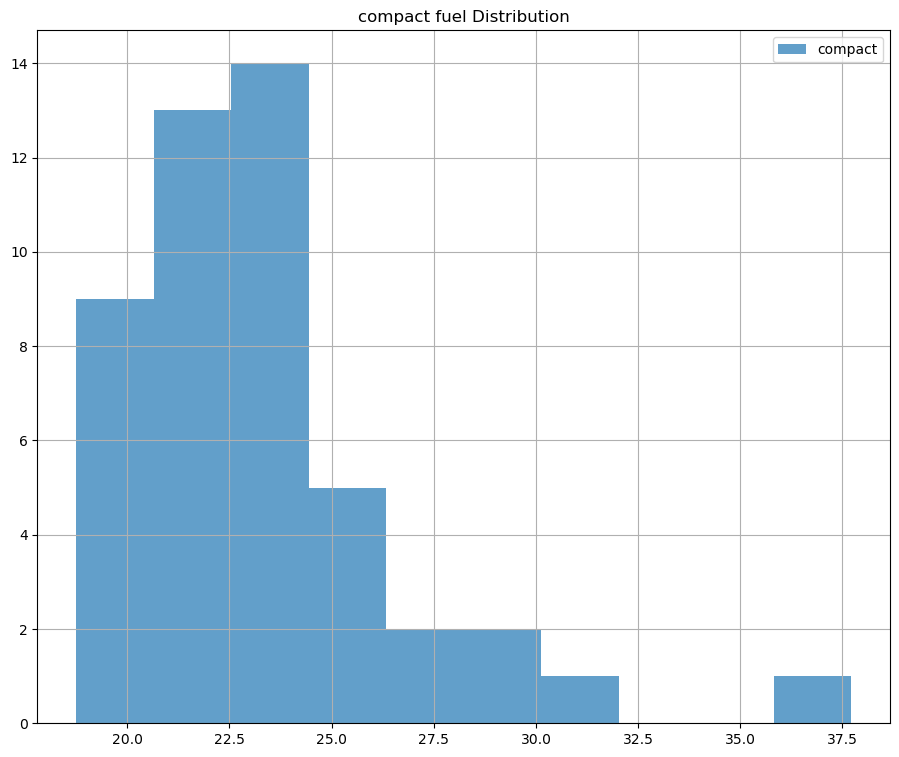

In [41]:
plt.figure(figsize=(11,9))
comp_fuel.hist(alpha=0.7, label='compact')
plt.title('compact fuel Distribution')
plt.legend()
plt.show()

In [46]:
# Pass in the compact car subset and mean of car from entire df.
t_stat, p = stats.ttest_1samp(comp_fuel,μ )

In [47]:
t_stat.round(4),p

(7.5124, 1.5617666348807277e-09)

In [48]:
if (t_stat < 0) and  ((p/2) <α ):
    print('We can reject our null hypothesis')
else:
    print('we fail to reject our null hypothesis')


we fail to reject our null hypothesis


In [49]:
# another way:

# I want to test that 
# the fuel efficiency of compact cars is greater,
# so my t_stat should be positive if I reject my H0
# and I want to check p/2 against alpha instead of just p.
# this is handled
# based on the way we defined test_hypothesis
# and the fact that we fed in our arguments
# as the sample we compared against
# the population, 
# which the alternative hypothesis was looking for a difference
# in the greater-than direction.
# the positive tail of the t-distribution)
test_hypothesis(p,
                t_stat,
                tails='one')


We can reject our null hypothesis!.
 Our p-value is 1.5617666348807277e-09 
 Our statistic value is 7.512360093161361



This conclude compact cars are not more fuel-efficient than the average car.

### Do manual cars get better gas mileage than automatic cars?

In [50]:
# 2-sample, 1-tail

In [51]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_e
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


create hypothesis:

𝐻𝑜 : There are no difference of gas mileage between auto and manual cars  

𝐻𝑎 : manual cars are more fuel-efficient than the auto car.

alpha=0.05

In [52]:
df.trans.unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [53]:
 # let's slice up the city mileage up between 
# automatic and manual transmissions
df.loc[:, 'is_auto'] = np.where(df.trans.str.startswith('a'), 'auto', 'manual')

In [54]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_e,is_auto
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,auto


In [55]:
df.is_auto.unique()

array(['auto', 'manual'], dtype=object)

In [56]:
# gas mileage of auto car in city
auto_car=df[df.is_auto == 'auto'].fuel_e
auto_car.head()

1    22.212766
4    24.705882
5    19.809524
7    21.600000
9    19.512195
Name: fuel_e, dtype: float64

In [57]:
# gas mileage of manual car in city
man_car=df[df.is_auto == 'manual'].fuel_e
man_car.head()

2     24.360000
3     24.313725
6     21.272727
8     21.272727
10    23.333333
Name: fuel_e, dtype: float64

In [ ]:
# testing of parameters :

# 1. The samples have a normal distribution (by "shapiro" )(presume)
#    (if "shapiro"m fails, do a "mann-whitneyu test")
# 2. The samples have equal variance
# 3. The samples have independence from eachother

In [58]:
auto_car.shape

(157,)

In [59]:
man_car.shape

(77,)

In [67]:
# if we want to run a shapiro test for normality rather than
# depending on CLT(confidence level test) and number of samples:
sha_stat_a, p_val_auto = stats.shapiro(auto_car)
sha_stat_a, p_val_auto

(0.9692274332046509, 0.0014063401613384485)

In [68]:
test_hypothesis(p_val_auto,sha_stat_a)

We can reject our null hypothesis!.
 Our p-value is 0.0014063401613384485 
 Our statistic value is 0.9692274332046509


In [69]:
sha_stat_m, p_val_man = stats.shapiro(man_car)
sha_stat_m, p_val_man

(0.9478844404220581, 0.0032812857534736395)

In [70]:
test_hypothesis(p_val_man,sha_stat_m)

We can reject our null hypothesis!.
 Our p-value is 0.0032812857534736395 
 Our statistic value is 0.9478844404220581


In [62]:
# H0: The distributions are normal
# Ha: The distributions are not normally distributed
# alpha: 0.05

In [63]:
# For parameter #2, I'm less confident because these distributions
# seem like they might be defined by different standard deviations
# lets actually do a test for that one:
# let have a hypothesis test before our real one

# levene test: test for equality of variance:
# H0: There is equal variance in our two samples
# Ha: There is an inequality of variance in our two samples

In [64]:
lev_stat, p_val = stats.levene(auto_car, man_car)
test_hypothesis(p_val,lev_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.9062462281015493.
 Our statistic is 0.013901207169738269


In [65]:
# since p_val > α, so we failed to reject Ho.
# there is equal variance.

In [72]:
# After all that, let's run a t-test:
t_stat, p = stats.ttest_ind(auto_car, man_car,equal_var=True)



In [73]:
test_hypothesis(p,t_stat,tails='one',α=0.05)
            

We fail to reject the null hypothesis :(.
 Our p-value is 5.510464610044009e-06.
 Our statistic is -4.652577547151351


In [76]:
## another way:--

if (t_stat < 0) and ((p / 2) < α):
    print('We can reject the null hypothesis!')
    print("we can say that the means are different and that there is a specifically lower mean in automatic cars")
    print(f'p-value is {p}')
else:
    prin('we fail to reject the null hypothesis')
    

We can reject the null hypothesis!
we can say that the means are different and that there is a specifically lower mean in automatic cars
p-value is 5.510464610044009e-06


This conclude manual cars are more fuel-efficient than the auto car.